<a href="https://colab.research.google.com/github/ansegundo/DeepLeague/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/rmovies_nlp/data/Glass (2019)/final_Glass (2019).csv')
df.head(2)

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
0,2019-01-18,mmght,"I know this is a very obvious fact, but I abso...",0,1262,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.15,184,34,0.0745,0.204,0.599,0.197
1,2019-01-18,3mf6n5,No. You were spectacular.,0,15,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.60,26,4,-0.2960,0.000,0.577,0.423


In [5]:
'''pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]'''

"pkmn_type_colors = ['#78C850',  # Grass\n                    '#F08030',  # Fire\n                    '#6890F0',  # Water\n                    '#A8B820',  # Bug\n                    '#A8A878',  # Normal\n                    '#A040A0',  # Poison\n                    '#F8D030',  # Electric\n                    '#E0C068',  # Ground\n                    '#EE99AC',  # Fairy\n                    '#C03028',  # Fighting\n                    '#F85888',  # Psychic\n                    '#B8A038',  # Rock\n                    '#705898',  # Ghost\n                    '#98D8D8',  # Ice\n                    '#7038F8',  # Dragon\n                   ]"

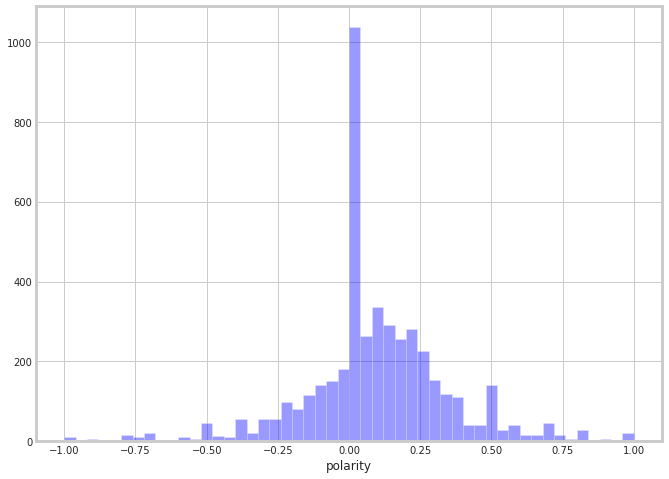

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(df['polarity'], kde=False, color="b")
#sns.distplot(df['polarity'], hist=False, color="g", kde_kws={"shade": True})
plt.show()

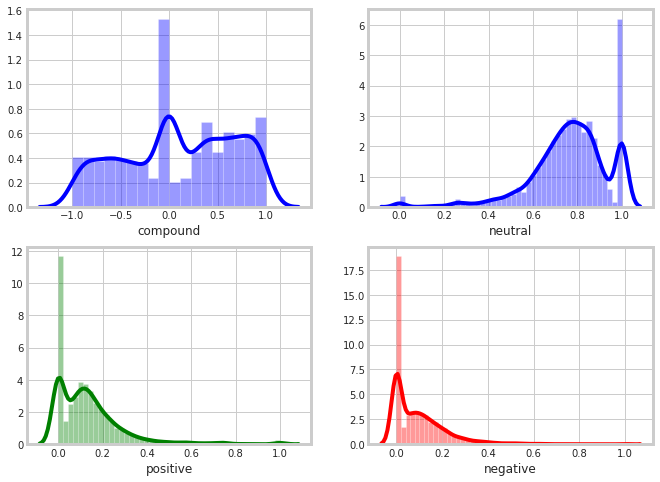

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.distplot(df['compound'],  color="b", ax=ax[0,0])
sns.distplot(df['positive'],  color="g", ax=ax[1,0])
sns.distplot(df['neutral'],  color="b", ax=ax[0,1])
sns.distplot(df['negative'], color="r", ax=ax[1,1])

plt.show()

In [8]:
print(df.shape)

(4649, 19)


In [9]:
df_30 = df[(df['days']>=1.0) & (df['days']<=30.0)]
print(df_30.shape)
df_30.head(2)

(4348, 19)


,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
0,2019-01-18,mmght,"I know this is a very obvious fact, but I abso...",0,1262,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.15,184,34,0.0745,0.204,0.599,0.197
1,2019-01-18,3mf6n5,No. You were spectacular.,0,15,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.60,26,4,-0.2960,0.000,0.577,0.423


In [10]:
df_30.tail(2)

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
4346,2019-02-15,pd9yl,"I try to be nice, and I like sweaters too.",0,3,8.0,964805.0,3.0,2449.0,394.0,101598720.0,29.0,0.600000,42,10,0.6486,0.469,0.531,0.00
4347,2019-02-16,38ibs6t7,"I thought ""Glass"" was a whole lot of fun! I wo...",0,6,8.0,1697640.0,76.0,2449.0,693.0,103296360.0,30.0,0.261765,787,124,0.9621,0.173,0.807,0.02


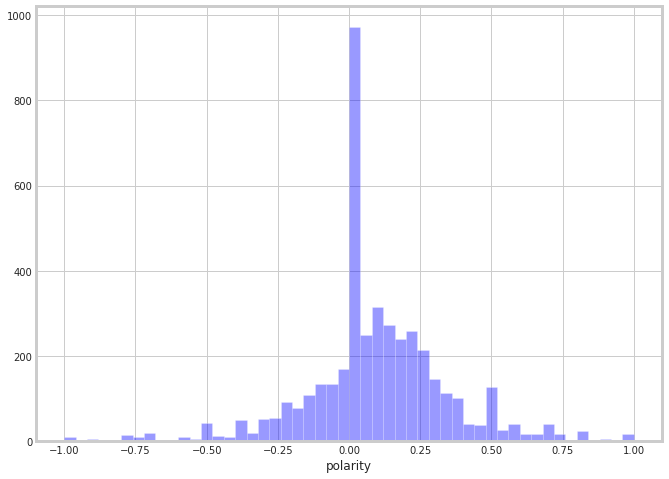

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(df_30['polarity'], kde=False, color="b")
#sns.distplot(df['polarity'], hist=False, color="g", kde_kws={"shade": True})
plt.show()

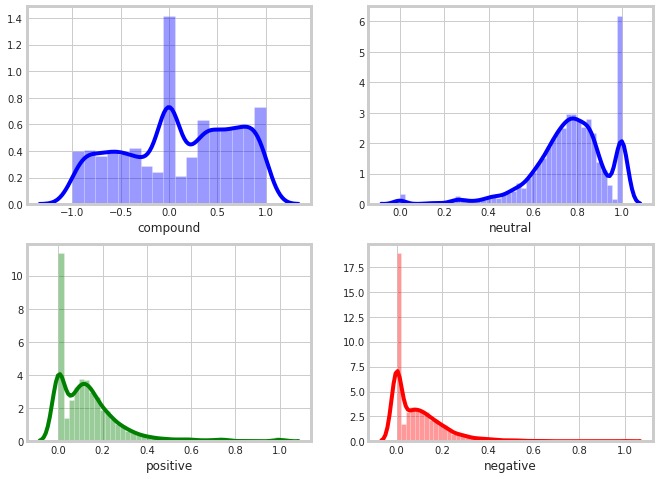

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))

sns.distplot(df_30['compound'],  color="b", ax=ax[0,0])
sns.distplot(df_30['positive'],  color="g", ax=ax[1,0])
sns.distplot(df_30['neutral'],  color="b", ax=ax[0,1])
sns.distplot(df_30['negative'], color="r", ax=ax[1,1])

plt.show()

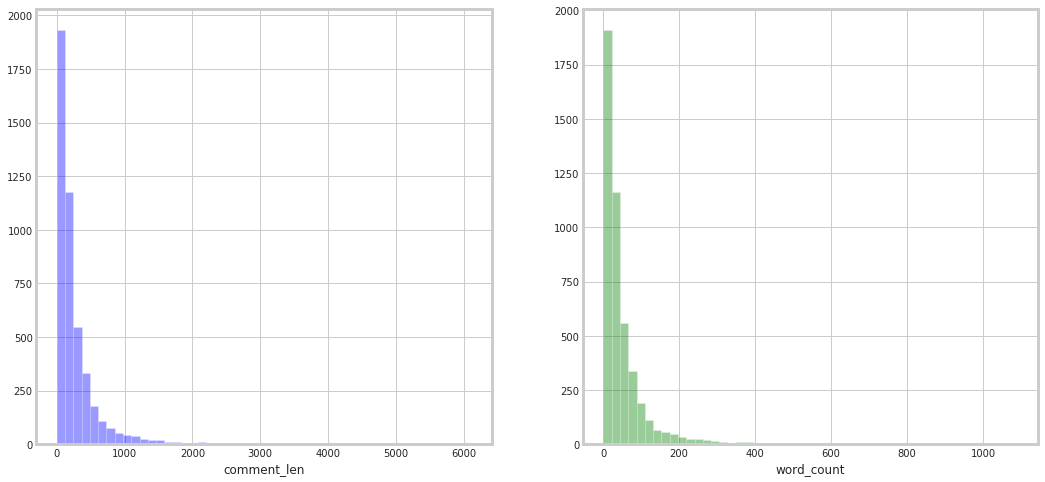

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))

sns.distplot(df['comment_len'], kde=False, color="b", ax=ax[0])
sns.distplot(df['word_count'],  kde=False,color="g", ax=ax[1])

plt.show()

It's understandable that in a forum some commenters will post more than once. But, how much is 'normal' and what can be said about those who comment a lot? In here I arbitrarily select x ammout of comments as cut off to explore what users are talking about.

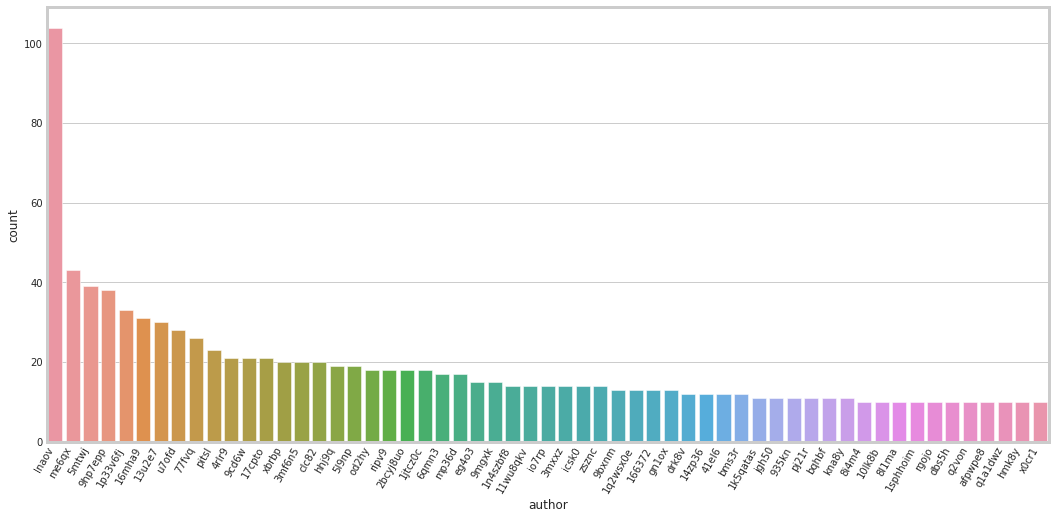

In [14]:
temp30 = df_30['author'].value_counts()
temp30 = pd.DataFrame(temp30).reset_index()
temp30.columns = ['author', 'count']
#temp30[temp30['count']>=10]

fig, ax = plt.subplots(figsize=(16,8))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
sns.barplot(x='author', y='count', data=temp30[temp30['count']>=10])

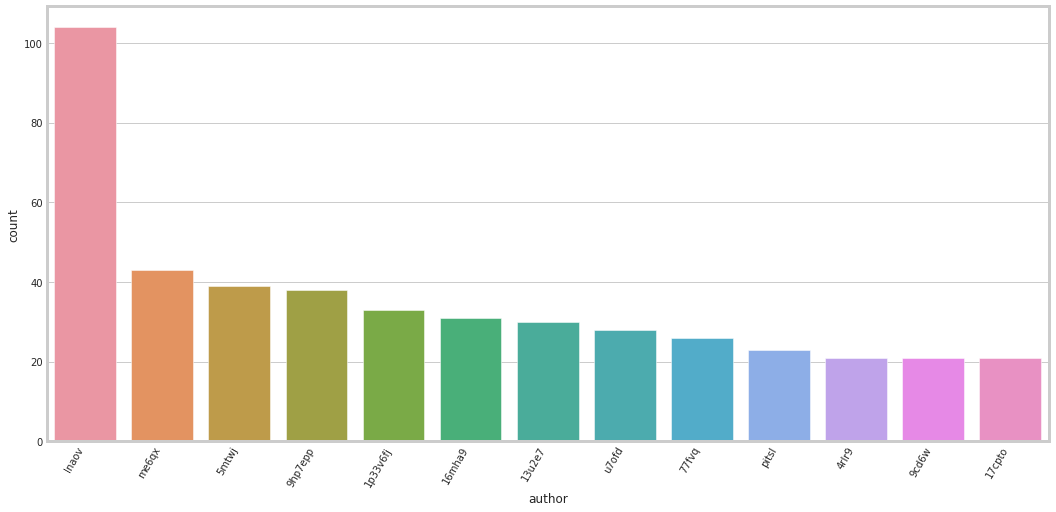

In [15]:
temp30 = df_30['author'].value_counts()
temp30 = pd.DataFrame(temp30).reset_index()
temp30.columns = ['author', 'count']
#temp30[temp30['count']>=0]

fig, ax = plt.subplots(figsize=(16,8))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
sns.barplot(x='author', y='count', data=temp30[temp30['count']>20])

In [16]:
df_30.sort_values(by=['polarity'], ascending=True)[:10]

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
1582,2019-01-19,1vr5p1xe,>This leads me to believe that she is doing a ...,0,-6,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,-1.0,183,34,-0.9153,0.000,0.718,0.282
384,2019-01-18,iiex1,Oh that makeup was supposed to age her... that...,0,1,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,-1.0,224,38,-0.7351,0.000,0.846,0.154
986,2019-01-18,i8n3dv1,"Nah man, they never had powers. Those people w...",0,-2,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,-1.0,124,19,0.1068,0.149,0.678,0.174
403,2019-01-18,hhj9q,"Oh my gosh yes, the ending was so terrible.......",0,5,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,-1.0,59,11,0.5538,0.284,0.716,0.000
1755,2019-01-19,31gc4,"crawling with hunter/gatherers, that place. te...",0,3,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,-1.0,149,22,-0.5106,0.092,0.696,0.212
3044,2019-01-21,16mha9,It was basically a boring sequel of Split.,0,8,1.0,6176030.0,-38.0,3841.0,1608.0,46504950.0,4.0,-1.0,42,8,-0.3182,0.000,0.723,0.277
3896,2019-01-27,e0ki0,"When he was walking Mr. Glass to the elevator,...",0,7,1.0,5268280.0,-39.0,3844.0,1371.0,73425575.0,10.0,-1.0,102,20,-0.4019,0.000,0.870,0.130
2087,2019-01-19,8obed,This movie is so fucking stupid and the commen...,0,7,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,-1.0,95,16,-0.6307,0.145,0.538,0.317
3462,2019-01-23,me6qx,THAT was SO stupid!,0,3,1.0,2144560.0,-44.0,3841.0,558.0,52464420.0,6.0,-1.0,19,4,-0.6925,0.000,0.389,0.611
1209,2019-01-18,17iln4,This.Glass said both in this movie and in Unbr...,0,5,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,-1.0,171,31,-0.4588,0.088,0.765,0.147


In [17]:
df_30.sort_values(by=['positive'], ascending=False)[:10]

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
1629,2019-01-19,kna8y,Agreed,0,10,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000,7,1,0.2732,1.0,0.0,0.0
464,2019-01-18,czsmx,yes,0,10,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.000,3,1,0.4019,1.0,0.0,0.0
3786,2019-01-26,9bxnm,True haha,0,1,1.0,8652565.0,74.0,3844.0,2251.0,68157295.0,9.0,0.275,9,2,0.7003,1.0,0.0,0.0
1823,2019-01-19,9ogie,Sure,0,7,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.500,4,1,0.3182,1.0,0.0,0.0
1746,2019-01-19,d6su2,Amazing.,0,0,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.600,8,1,0.5859,1.0,0.0,0.0
441,2019-01-18,hhj9q,Agreed,0,3,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.000,6,1,0.2732,1.0,0.0,0.0
2841,2019-01-21,29n52z69,"Yeah, pretty sure",0,2,1.0,6176030.0,-38.0,3841.0,1608.0,46504950.0,4.0,0.375,17,3,0.7717,1.0,0.0,0.0
2903,2019-01-21,by6ia,"ok, thanks.",0,2,1.0,6176030.0,-38.0,3841.0,1608.0,46504950.0,4.0,0.350,12,2,0.6249,1.0,0.0,0.0
1678,2019-01-19,dy7gg,Yep,0,1,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000,3,1,0.2960,1.0,0.0,0.0
267,2019-01-18,61tmm,:),0,1,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.500,2,1,0.4588,1.0,0.0,0.0


In [18]:
df_30.sort_values(by=['negative'], ascending=False)[:10]

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
2375,2019-01-20,4n9dg,Irony,0,1,1.0,9918070.0,-32.0,3841.0,2582.0,40328920.0,3.0,0.000,6,1,-0.0516,0.0,0.000,1.000
1458,2019-01-19,bm9m8,no doubt,0,1,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000,8,2,-0.5719,0.0,0.000,1.000
1879,2019-01-19,iziwy,no u,0,8,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000,4,2,-0.2960,0.0,0.000,1.000
2947,2019-01-21,e94gb,No problem!,0,2,1.0,6176030.0,-38.0,3841.0,1608.0,46504950.0,4.0,0.000,11,2,-0.6360,0.0,0.000,1.000
3869,2019-01-27,t6d6s,No :/,0,1,1.0,5268280.0,-39.0,3844.0,1371.0,73425575.0,10.0,-0.250,5,2,-0.5574,0.0,0.000,1.000
4089,2019-02-01,11jsx8,Damn. Double damn.,0,2,1.0,2756700.0,123.0,3665.0,752.0,81876800.0,15.0,0.000,19,3,-0.6597,0.0,0.156,0.844
142,2019-01-18,6jk3a,hell na,0,5,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.000,7,2,-0.6808,0.0,0.179,0.821
1660,2019-01-19,6r55w,No wayyyyyy :o,0,2,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.050,15,3,-0.3818,0.0,0.217,0.783
2787,2019-01-20,pnxy6,Youre dumb,0,3,1.0,9918070.0,-32.0,3841.0,2582.0,40328920.0,3.0,-0.375,10,2,-0.5106,0.0,0.233,0.767
168,2019-01-18,18srocb0,You’re wrong,0,-1,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,-0.500,13,2,-0.4767,0.0,0.244,0.756


In [19]:
df_30.sort_values(by=['neutral'], ascending=False)[:10]

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
3867,2019-01-27,8a6av,And when he was Jade kinda seducing Daryl,0,12,1.0,5268280.0,-39.0,3844.0,1371.0,73425575.0,10.0,0.000000,41,8,0.0,0.0,1.0,0.0
514,2019-01-18,xxqgh,She has a foster family now and she tells Kevi...,0,2,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,-0.100000,69,15,0.0,0.0,1.0,0.0
1525,2019-01-19,drk8v,Not even a little bit.,0,-2,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,-0.187500,23,5,0.0,0.0,1.0,0.0
3940,2019-01-28,174hj0,"Could be, I didnt notice it while he was in ho...",0,2,1.0,1310025.0,-75.0,3844.0,341.0,74735600.0,11.0,0.000000,85,17,0.0,0.0,1.0,0.0
1535,2019-01-19,odpov,Valid points.,0,2,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000000,14,2,0.0,0.0,1.0,0.0
1541,2019-01-19,ulsm2,> copious pot holesftfy,0,1,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000000,23,4,0.0,0.0,1.0,0.0
1558,2019-01-19,drk8v,"""Violently""",0,0,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,-0.800000,12,1,0.0,0.0,1.0,0.0
1559,2019-01-19,9mr6v,They Red Weddingd him.,0,3,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000000,22,4,0.0,0.0,1.0,0.0
1565,2019-01-19,5i7a2,It literally was.,0,0,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.000000,17,3,0.0,0.0,1.0,0.0
3927,2019-01-27,14rrdt,“The story moves quick” did we watch the same ...,0,1,1.0,5268280.0,-39.0,3844.0,1371.0,73425575.0,10.0,0.166667,52,10,0.0,0.0,1.0,0.0


In [20]:
df_30.sort_values(by=['compound'], ascending=False)[:10]

,date,author,comment,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
1156,2019-01-18,156sb5,I just came back from the theater watching thi...,0,45,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.161986,6022,1087,0.9992,0.175,0.761,0.064
3837,2019-01-26,nz31k,I originally made a new thread on this earlier...,0,7,1.0,8652565.0,74.0,3844.0,2251.0,68157295.0,9.0,0.156440,6108,1091,0.9990,0.172,0.750,0.078
2094,2019-01-19,96mqn,Heres a Letterboxd review I wrote on it:There’...,0,2,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.215316,3220,528,0.9985,0.188,0.789,0.023
1057,2019-01-18,1sqte0xj,Im actually still trying to figure out what I ...,0,4,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.328307,1648,296,0.9978,0.252,0.704,0.044
249,2019-01-18,dp0dv,Basically any time a superhero movie comes out...,0,8,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.150536,5435,992,0.9978,0.135,0.811,0.054
1219,2019-01-18,fp86h,Context for my viewing: I watched Split when i...,0,7,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.203896,2252,398,0.9976,0.204,0.753,0.043
1975,2019-01-19,t6j9a,**The Pros:** * The acting was all pretty gre...,0,8,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.239077,2749,499,0.9972,0.205,0.717,0.078
4248,2019-02-06,te6g6nr,I really wanted to like it but just felt that ...,0,14,1.0,737590.0,-38.0,3665.0,201.0,91427500.0,20.0,0.227650,3908,689,0.9967,0.174,0.730,0.095
4268,2019-02-07,y0nh5,"I really think this is way underrated, probabl...",0,13,2.0,627080.0,-15.0,3665.0,171.0,92054580.0,21.0,0.256452,1271,239,0.9951,0.236,0.715,0.050
1985,2019-01-19,1nkjw50e,I still need some time to think on it and poss...,0,8,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.350000,860,163,0.9951,0.288,0.678,0.034


In [21]:
agg_30 = df_30.groupby(by=['date']).mean().reset_index()
agg_30.head()

,date,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
0,2019-01-18,0.001502,42.861111,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.083731,285.042793,51.738739,0.116097,0.140806,0.756245,0.102949
1,2019-01-19,0.000000,11.907228,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.080294,296.600863,53.807983,0.065578,0.141461,0.751248,0.107294
2,2019-01-20,0.000000,11.075862,1.0,9918070.0,-32.0,3841.0,2582.0,40328920.0,3.0,0.087276,244.684483,44.560345,0.080290,0.135105,0.773033,0.090153
3,2019-01-21,0.000000,8.137931,1.0,6176030.0,-38.0,3841.0,1608.0,46504950.0,4.0,0.088577,280.665517,51.610345,0.121127,0.147793,0.758886,0.089855
4,2019-01-22,0.000000,6.989247,1.0,3814910.0,-38.0,3841.0,993.0,50319860.0,5.0,0.108622,274.770609,49.724014,0.130344,0.127290,0.798208,0.074466


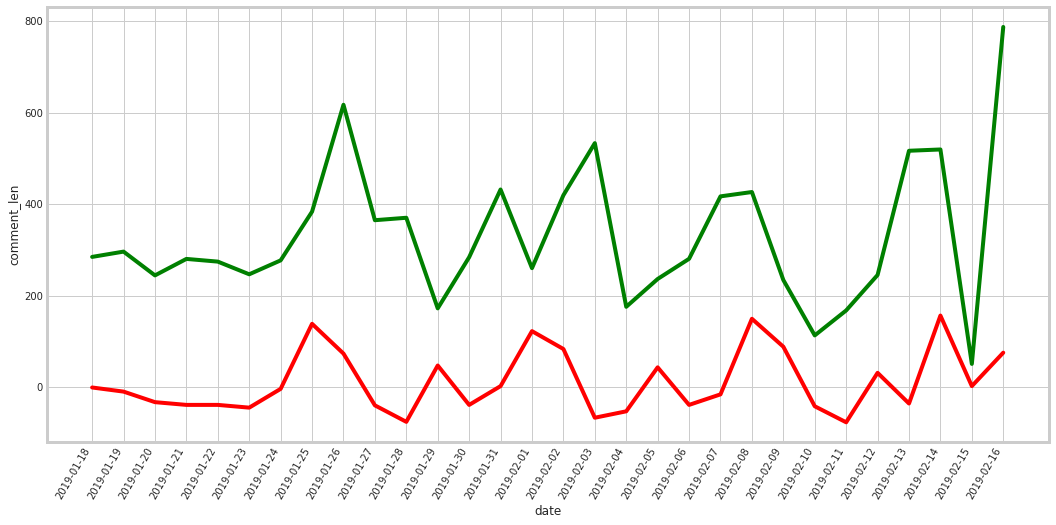

In [22]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(x="date", y="% change", color='r', data=agg_30)
sns.lineplot(x="date", y="comment_len", color='g', data=agg_30)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
plt.show()

In [36]:
most_commenters = df_30[df_30['author'].isin(temp30[temp30['count']>20]['author'].tolist())]


agg_30 = agg_30.set_index('date')
agg_30.head(2)

,is_gilded,upvotes,rank,gross,% change,theaters,per theater,total gross,days,polarity,comment_len,word_count,compound,positive,neutral,negative
date,,,,,,,,,,,,,,,,
2019-01-18,0.001502,42.861111,1.0,15886745.0,0.0,3841.0,4136.0,15886745.0,1.0,0.083731,285.042793,51.738739,0.116097,0.140806,0.756245,0.102949
2019-01-19,0.000000,11.907228,1.0,14524105.0,-9.0,3841.0,3781.0,30410850.0,2.0,0.080294,296.600863,53.807983,0.065578,0.141461,0.751248,0.107294


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_30)

30

In [0]:
scaled_agg = pd.DataFrame(scaled_data, columns=agg_30.columns)

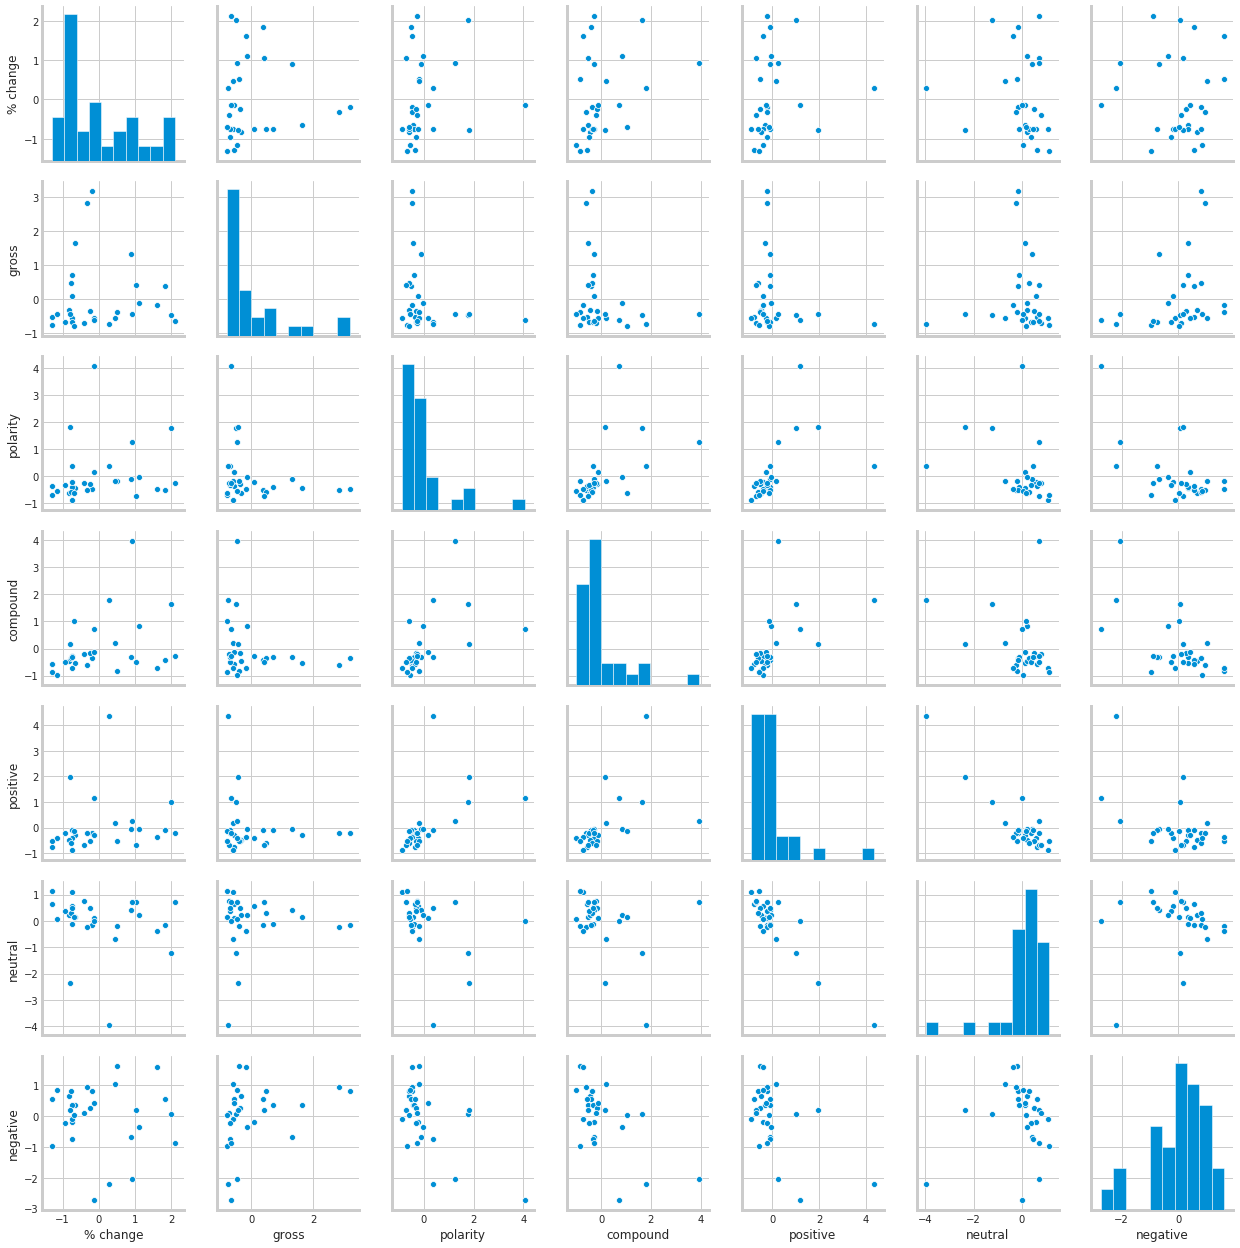

In [64]:
g = sns.pairplot(scaled_agg[['% change','gross','polarity','compound','positive','neutral','negative']])
plt.show()